In [1]:
import pandas as pd
import logging
import warnings
from pathlib import Path
from tqdm.notebook import tqdm
import sys

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
# sys.path.append('/opt/data/Nature')

In [ ]:
# %cd Nature

# Download data

In [3]:
meta_df_raw = pd.read_csv('m1_patchseq_meta_data.csv', delimiter='\t')
meta_df_temp = pd.read_csv('m1_patchseq_phys_temp_meta_data.csv', delimiter='\t')
meta_df = pd.concat([meta_df_raw, meta_df_temp], ignore_index=True)
meta_df.head()

,Number,Cell,Slice,Date,Sample,Mouse,Mouse date of birth,Mouse age,Mouse gender,Mouse genotype,...,Soma depth (µm),Soma depth (4x),Cortical thickness (4x),Cortical thickness (µm),Traced,Exclusion reasons,Pipette Resistance (MΩ),Access Resistance (MΩ),Seal Resistance (MΩ),Recording Temperature (˚C)
0,1,20171204_sample_2,20171204_slice_2,2017-12-04,sample 2,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,736.7,271.0,535.8,1478.808,y,NaN,NaN,NaN,NaN,NaN
1,2,20171204_sample_4,20171204_slice_4,2017-12-04,sample 4,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,726.2,285.7,545.9,1506.684,y,NaN,NaN,NaN,NaN,NaN
2,3,20171204_sample_5,20171204_slice_5,2017-12-04,sample 5,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,659.8,241.8,530.4,1463.904,y,NaN,NaN,NaN,NaN,NaN
3,4,20171204_sample_6,20171204_slice_6,2017-12-04,sample 6,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,571.7,210.0,501.1,1383.036,y,NaN,NaN,NaN,NaN,NaN
4,5,20171207_sample_1,20171207_slice_1,2017-12-07,sample 1,mouse_UGZSW,2017-09-18,80,F,Sst-IRES-Cre/wt; Ai9/wt,...,772.4,288.9,477.1,1316.796,y,NaN,NaN,NaN,NaN,NaN


In [6]:
meta_df.columns

Index(['Number', 'Cell', 'Slice', 'Date', 'Sample', 'Mouse',
       'Mouse date of birth', 'Mouse age', 'Mouse gender', 'Mouse genotype',
       'Targeted layer', 'Inferred layer', 'Cre', 'Exon reads', 'Intron reads',
       'Intergenic reads', 'Sequencing batch', 'Number of genes detected',
       'RNA family', 'RNA type', 'RNA type confidence', 'RNA type top-3',
       'ALM/VISp top-3', 'Length (bp)', 'Yield (pg/µl)', 'User',
       'Hold Time (min)', 'Soma depth (µm)', 'Soma depth (4x)',
       'Cortical thickness (4x)', 'Cortical thickness (µm)', 'Traced',
       'Exclusion reasons'],
      dtype='object')

In [7]:
meta_df.describe()

,Number,Mouse age,Exon reads,Intron reads,Intergenic reads,Sequencing batch,Number of genes detected,RNA type confidence,Hold Time (min),Soma depth (4x),Cortical thickness (4x),Cortical thickness (µm)
count,2658.000000,2658.000000,2.658000e+03,2.658000e+03,2.658000e+03,2658.000000,2658.000000,2464.000000,2654.000000,2568.000000,2568.000000,2658.000000
mean,665.000000,83.920993,1.527525e+06,9.722459e+05,1.711816e+05,6.283672,9096.946576,0.764813,29.275810,239.596238,547.978287,1461.209459
std,383.721334,30.620391,1.571159e+06,1.192155e+06,1.923230e+05,2.799276,3534.055366,0.198536,14.930447,144.579850,47.801271,302.777029
min,1.000000,35.000000,2.000000e+00,4.000000e+00,1.000000e+00,1.000000,11.000000,0.140000,3.000000,16.500000,414.800000,0.000000
25%,333.000000,64.000000,6.059430e+05,1.292800e+05,7.268500e+04,4.000000,6905.000000,0.617500,15.000000,112.725000,514.425000,1408.428000
50%,665.000000,75.000000,1.190890e+06,6.881400e+05,1.337650e+05,7.000000,9589.000000,0.810000,29.000000,219.350000,547.000000,1504.476000
75%,997.000000,100.000000,1.930027e+06,1.353231e+06,2.048570e+05,9.000000,11299.000000,0.940000,40.000000,351.700000,580.025000,1597.764000
max,1329.000000,245.000000,1.817294e+07,1.326539e+07,2.326755e+06,12.000000,24833.000000,1.000000,85.000000,675.100000,706.500000,1949.940000


In [10]:
dandi_ls_08=!dandi ls -r json https://gui.dandiarchive.org/#/dandiset/000008/draft

In [11]:
dandi_ls_35=!dandi ls -r json https://gui.dandiarchive.org/#/dandiset/000035/draft

In [12]:
def generate_dandi_res(dandi_ls):
    res=dict()
    key_fields = ['asset_id', 'created', 'modified', 'path', 'ephys_session_id', 'size']
    for row in dandi_ls:
        sp = row.split(': ')
        if len(sp)==2:
            k,v = sp
            k = k.strip('-').strip()
            v = v.strip("'").strip()
            if k not in key_fields:
                continue
            if k=='asset_id' and res:
                if 'asset_id' in res:
                    yield res
                res = dict()
            res[k]=v
            if k=='path':
                ephys_id = v.split('_ses-')[-1].split('_')[0]
                res['ephys_session_id']=ephys_id
        else:
            continue
    yield res

In [13]:
gen_raw = generate_dandi_res(dandi_ls_08)
gen_temp = generate_dandi_res(dandi_ls_35)

In [14]:
dandi_ls_df_raw = pd.DataFrame(gen_raw)
dandi_ls_df_temp = pd.DataFrame(gen_temp)

In [15]:
dandi_ls_df_raw['nwb_download_link'] = dandi_ls_df_raw['asset_id'].map(
    lambda id_: f'https://api.dandiarchive.org/api/dandisets/000008/versions/draft/assets/{id_}/download/')
dandi_ls_df_temp['nwb_download_link'] = dandi_ls_df_temp['asset_id'].map(
    lambda id_: f'https://api.dandiarchive.org/api/dandisets/000035/versions/draft/assets/{id_}/download/')
dandi_ls_df = pd.concat([dandi_ls_df_raw, dandi_ls_df_temp], ignore_index=True)
dandi_ls_df.head()

,asset_id,modified,path,ephys_session_id,size,nwb_download_link
0,13eb9838-8a09-431e-8724-06a12fabb2d8,2021-08-05T18:44:28.109496+00:00,sub-mouse-AAYYT/sub-mouse-AAYYT_ses-20180420-s...,20180420-sample-2,9337840,https://api.dandiarchive.org/api/dandisets/000...
1,028fb5b3-5a24-4495-873e-b4ed2664db7d,2021-08-05T18:44:28.153974+00:00,sub-mouse-AEJGZ/sub-mouse-AEJGZ_ses-20180315-s...,20180315-sample-2,5206447,https://api.dandiarchive.org/api/dandisets/000...
2,af1cccda-6715-4d07-b491-5abe22194b0f,2021-08-05T18:44:28.187419+00:00,sub-mouse-AAYYT/sub-mouse-AAYYT_ses-20180420-s...,20180420-sample-3,9310558,https://api.dandiarchive.org/api/dandisets/000...
3,15d39431-baaf-4b99-abce-f2f87f3d3766,2021-08-05T18:44:28.220243+00:00,sub-mouse-AEJGZ/sub-mouse-AEJGZ_ses-20180315-s...,20180315-sample-1,8527066,https://api.dandiarchive.org/api/dandisets/000...
4,1e69d81e-1b4d-4ab5-9b28-a66b6d9c2fbd,2021-08-05T18:44:28.252645+00:00,sub-mouse-AAYYT/sub-mouse-AAYYT_ses-20180420-s...,20180420-sample-4,9500838,https://api.dandiarchive.org/api/dandisets/000...


In [77]:
dandi_ls_df.to_csv('dandiset_08_15_metadata.csv', index=False)

In [4]:
# optional use
dandi_ls_df = pd.read_csv('dandiset_08_15_metadata.csv')

## Download NWB files

In [5]:
meta_mouses = meta_df_raw['Mouse'].str.replace('mouse_','')
meta_samples = meta_df_raw['Cell'].str.replace('_','-')
meta_slices = meta_df_raw['Slice'].str.replace('_','-')
meta_df_raw['path'] = ('sub-mouse-'+meta_mouses+'/'+'sub-mouse-'+meta_mouses+'_ses-'
                  +meta_samples+'_slice-'+meta_slices+'_cell-'+meta_samples+'_icephys.nwb')

In [6]:
meta_mouses = meta_df_temp['Mouse'].str.replace('mouse_','')
meta_samples = meta_df_temp['Cell'].str.replace('_','-')
meta_slices = meta_df_temp['Slice'].str.replace('_','-')
meta_df_temp['path'] = ('sub-mouse-'+meta_mouses+'/'+'sub-mouse-'+meta_mouses+'_ses-'
                        +meta_samples+'_slice-'+meta_slices+'_cell-'+meta_samples+'_icephys.nwb')

In [7]:
meta_df = pd.concat([meta_df_raw, meta_df_temp], ignore_index=True)

In [8]:
meta_df[~meta_df['path'].isin(dandi_ls_df['path'])]

,Number,Cell,Slice,Date,Sample,Mouse,Mouse date of birth,Mouse age,Mouse gender,Mouse genotype,...,Soma depth (4x),Cortical thickness (4x),Cortical thickness (µm),Traced,Exclusion reasons,path,Pipette Resistance (MΩ),Access Resistance (MΩ),Seal Resistance (MΩ),Recording Temperature (˚C)
626,627,20190211_sample_10,20190211_slice_4,2019-02-11,Sample 10,mouse_PYVMS,2018-10-14,120,F,Pvalb-Cre/wt; Ai9/wt,...,385.5,546.3,1507.788,y,NaN,sub-mouse-PYVMS/sub-mouse-PYVMS_ses-20190211-s...,NaN,NaN,NaN,NaN
1421,93,20200408_sample_28,20200408_slice_4,2020-04-08,sample 28,mouse_ZUDOB,2020-01-31,68,M,Sst-IRES-Cre/wt; Ai9/wt,...,0.0,0.0,1640.000,NaN,NaN,sub-mouse-ZUDOB/sub-mouse-ZUDOB_ses-20200408-s...,4.6,19.8,136.6,33-34


2 cells not found nwb link.

In [16]:
electro_df_raw = meta_df_raw.merge(dandi_ls_df_raw[['ephys_session_id', 'asset_id', 'nwb_download_link', 'path']], 
                                   how='inner', on='path', validate='1:1')
electro_df_raw['path'] = electro_df_raw['path'].map(lambda p: 'nwb/'+Path(p).name)
electro_df_raw.head()

,Number,Cell,Slice,Date,Sample,Mouse,Mouse date of birth,Mouse age,Mouse gender,Mouse genotype,...,Soma depth (µm),Soma depth (4x),Cortical thickness (4x),Cortical thickness (µm),Traced,Exclusion reasons,path,ephys_session_id,asset_id,nwb_download_link
0,1,20171204_sample_2,20171204_slice_2,2017-12-04,sample 2,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,736.7,271.0,535.8,1478.808,y,NaN,nwb/sub-mouse-GTOKH_ses-20171204-sample-2_slic...,20171204-sample-2,37c8ef44-9962-4d59-b861-009d94fc2e41,https://api.dandiarchive.org/api/dandisets/000...
1,2,20171204_sample_4,20171204_slice_4,2017-12-04,sample 4,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,726.2,285.7,545.9,1506.684,y,NaN,nwb/sub-mouse-GTOKH_ses-20171204-sample-4_slic...,20171204-sample-4,3f7aeaab-b347-4396-b7de-ca94f220c01a,https://api.dandiarchive.org/api/dandisets/000...
2,3,20171204_sample_5,20171204_slice_5,2017-12-04,sample 5,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,659.8,241.8,530.4,1463.904,y,NaN,nwb/sub-mouse-GTOKH_ses-20171204-sample-5_slic...,20171204-sample-5,69e5512e-ca1e-4bba-977c-79055d33d6bb,https://api.dandiarchive.org/api/dandisets/000...
3,4,20171204_sample_6,20171204_slice_6,2017-12-04,sample 6,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,571.7,210.0,501.1,1383.036,y,NaN,nwb/sub-mouse-GTOKH_ses-20171204-sample-6_slic...,20171204-sample-6,3ad6a394-80d7-407c-9264-2257b4c7d70a,https://api.dandiarchive.org/api/dandisets/000...
4,5,20171207_sample_1,20171207_slice_1,2017-12-07,sample 1,mouse_UGZSW,2017-09-18,80,F,Sst-IRES-Cre/wt; Ai9/wt,...,772.4,288.9,477.1,1316.796,y,NaN,nwb/sub-mouse-UGZSW_ses-20171207-sample-1_slic...,20171207-sample-1,7ad3819e-4077-40a7-978e-c2d0ad1fd747,https://api.dandiarchive.org/api/dandisets/000...


In [17]:
electro_df_temp = meta_df_temp.merge(dandi_ls_df_temp[['ephys_session_id', 'asset_id', 'nwb_download_link', 'path']],
                                     how='inner', on='path', validate='1:1')
electro_df_temp['path'] = electro_df_temp['path'].map(lambda p: 'nwb_temp/'+Path(p).name)
electro_df_temp.head()

,Number,Cell,Slice,Date,Sample,Mouse,Mouse date of birth,Mouse age,Mouse gender,Mouse genotype,...,Traced,Exclusion reasons,Pipette Resistance (MΩ),Access Resistance (MΩ),Seal Resistance (MΩ),Recording Temperature (˚C),path,ephys_session_id,asset_id,nwb_download_link
0,1,20200403_sample_1,20200403_slice_1,2020-04-03,sample 1,mouse_KIYRP,2020-01-31,63,M,Sst-IRES-Cre/wt; Ai9/wt,...,NaN,NaN,2.91,22.9,256.9,33-34,nwb_temp/sub-mouse-KIYRP_ses-20200403-sample-1...,20200403-sample-1,42459f42-267e-4073-accd-a78d16ba80ef,https://api.dandiarchive.org/api/dandisets/000...
1,2,20200403_sample_2,20200403_slice_1,2020-04-03,sample 2,mouse_KIYRP,2020-01-31,63,M,Sst-IRES-Cre/wt; Ai9/wt,...,NaN,NaN,30.70,11.3,145.0,33-34,nwb_temp/sub-mouse-KIYRP_ses-20200403-sample-2...,20200403-sample-2,baeb07f5-170a-429b-8656-b6044e584eb4,https://api.dandiarchive.org/api/dandisets/000...
2,3,20200403_sample_3,20200403_slice_1,2020-04-03,sample 3,mouse_KIYRP,2020-01-31,63,M,Sst-IRES-Cre/wt; Ai9/wt,...,NaN,NaN,3.07,26.5,266.5,33-34,nwb_temp/sub-mouse-KIYRP_ses-20200403-sample-3...,20200403-sample-3,500c0d4b-76ec-47c7-bb24-ff9af6ab2309,https://api.dandiarchive.org/api/dandisets/000...
3,4,20200403_sample_4,20200403_slice_1,2020-04-03,sample 4,mouse_KIYRP,2020-01-31,63,M,Sst-IRES-Cre/wt; Ai9/wt,...,NaN,NaN,3.24,13.7,143.8,33-34,nwb_temp/sub-mouse-KIYRP_ses-20200403-sample-4...,20200403-sample-4,9912e6f1-4a33-4b41-bba3-e888d47d38a2,https://api.dandiarchive.org/api/dandisets/000...
4,5,20200403_sample_5,20200403_slice_2,2020-04-03,sample 5,mouse_KIYRP,2020-01-31,63,M,Sst-IRES-Cre/wt; Ai9/wt,...,NaN,NaN,2.94,15.7,180.1,33-34,nwb_temp/sub-mouse-KIYRP_ses-20200403-sample-5...,20200403-sample-5,68d4d528-c31b-4e09-ab6d-fc8788d86ada,https://api.dandiarchive.org/api/dandisets/000...


In [18]:
electro_df = pd.concat([electro_df_raw, electro_df_temp])
electro_df.to_csv('m1_electro_meta_df.csv', index=False)

In [6]:
# optional use
electro_df = pd.read_csv('m1_electro_meta_df.csv')

Batch downloading

In [89]:
Path('nwb').mkdir(exist_ok=True)
Path('nwb_temp').mkdir(exist_ok=True)

In [95]:
for _, row in tqdm(electro_df.iterrows(), total=electro_df.shape[0]):
    out_path = Path(row['path'])
    if not out_path.exists():
        out_dir = out_path.parent.as_posix()
        download_link = row['nwb_download_link']
        !dandi download -o {out_dir} -e skip {download_link}

  0%|          | 0/1512 [00:00<?, ?it/s]

PATH                                                                                            SIZE    DONE           DONE% CHECKSUM STATUS          MESSAGE
sub-mouse-KIYRP_ses-20200403-sample-1_slice-20200403-slice-1_cell-20200403-sample-1_icephys.nwb 9.3 MB  9.3 MB          100%    ok    done                   
Summary:                                                                                        9.3 MB  9.3 MB                        1 done                 
                                                                                                        100.00%                                              
2021-08-16 15:24:33,274 [    INFO] Logs saved in /root/.cache/dandi-cli/log/20210816151453Z-1993.log
PATH                                                                                            SIZE    DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-mouse-KIYRP_ses-20200403-sample-2_slice-20200403-slice-1_cell-20200403-sample-2_icephys.nwb 9.3 MB  9.3 

In [96]:
from itertools import chain
nwb_dir_iter = chain(Path('nwb').iterdir(), Path('nwb_temp').iterdir())
downlowded_files = [f for f in nwb_dir_iter if f.suffix=='.nwb']
len(downlowded_files)

1511

In [97]:
!du -sh nwb*

12G	nwb
1.6G	nwb_temp


Filter ME neurons:

In [21]:
select_L5_ids_df = pd.read_csv('Scala_ephys_feature.csv', usecols=['cell.id'])
select_L5_ids = select_L5_ids_df['cell.id']
L5_me_df = pd.read_csv('Scala_morpho_feature.csv', usecols=['cell.id'])
L5_me_ids = L5_me_df['cell.id']

In [22]:
electro_df_L5=electro_df[electro_df['Cell'].isin(select_L5_ids)]
electro_df_me=electro_df[electro_df['Cell'].isin(L5_me_ids)]
electro_df_nm=electro_df_L5[~electro_df_L5['Cell'].isin(electro_df_me['Cell'])]

In [23]:
electro_df_L5.shape, electro_df_me.shape, electro_df_nm.shape

((469, 41), (154, 41), (315, 41))

In [105]:
ids_neg = [id_ for id_ in select_L5_ids if id_ not in electro_df['Cell'].values]
ids_neg_df = pd.DataFrame({'Cell': ids_neg})
ids_neg_df.to_csv('L5_CellIDs_not_exist.csv', index=False)

In [106]:
len(ids_neg)

1

# Plot trace

In [24]:
from Nature.electro_utils import custom_create_ephys_data_set, plot_iclamp_sweep, plot_nwb_trace
import matplotlib.pyplot as plt

Calculate IV ranges for plotting:

In [17]:
def get_iv_dataset(nwb):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        dataset = custom_create_ephys_data_set(nwb_file=nwb)
    return dataset

def get_iv_range(nwb):
    dataset = get_iv_dataset(nwb)
    sweep_table = dataset.sweep_table
    sweeps = dataset.sweep_set(sweep_table['sweep_number'].tolist())
    i_ranges = [(min(i), max(i)) for i in sweeps.i]
    v_ranges = [(min(v), max(v)) for v in sweeps.v]
    min_is, max_is = zip(*i_ranges)
    min_vs, max_vs = zip(*v_ranges)
    return min(min_is), max(max_is), min(min_vs), max(max_vs)

In [19]:
iv_range_df = pd.DataFrame(((p, *get_iv_range(p)) for p in tqdm(electro_df_me['path'])),
                           columns=['path','min_i', 'max_i', 'min_v', 'max_v'])
iv_range_df.head()

  0%|          | 0/154 [00:00<?, ?it/s]

/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/stimulus.py:88: UserWarning: Could not find stimulus: NA
  warnings.warn("Could not find stimulus: %s" % tag)
/usr/local/envs/neuron/lib/python3.8/site-packages/pynwb/icephys.py:329: UserWarning: Unit 'volts' for CurrentClampStimulusSeries 'CurrentClampSeriesIZero' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  warnings.warn(
/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/stimulus.py:88: UserWarning: Could not find stimulus: N/A
  warnings.warn("Could not find stimulus: %s" % tag)
/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/stimulus.py:88: UserWarning: Could not find stimulus: NA
  warnings.warn("Could not find stimulus: %s" % tag)
/usr/local/envs/neuron/lib/python3.8/site-packages/pynwb/icephys.py:329: UserWarning: Unit 'volts' for CurrentClampStimulusSeries 'CurrentClampSeriesIZero' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  warnings.warn(
/usr/local/envs/neuron/lib/python3.8/si

,path,min_i,max_i,min_v,max_v
0,nwb/sub-mouse-LBJDN_ses-20180215-sample-1_slic...,-2.000000e+14,1.380000e+15,-97041.815519,49518.063664
1,nwb/sub-mouse-XECLH_ses-20180327-sample-1_slic...,-2.000000e+14,1.380000e+15,-96425.689757,50498.537719
2,nwb/sub-mouse-XECLH_ses-20180327-sample-4_slic...,-2.000000e+14,1.380000e+15,-105918.392539,44660.981745
3,nwb/sub-mouse-XECLH_ses-20180327-sample-5_slic...,-2.000000e+14,1.380000e+15,-87301.008403,48983.950168
4,nwb/sub-mouse-ZWNGI_ses-20180404-sample-5_slic...,-3.200000e+14,1.260000e+15,-100862.309337,45364.845544


In [20]:
iv_range_df.agg({'min_i': min, 'max_i':max, 'min_v':min,'max_v':max})

min_i   -3.200000e+14
max_i    1.480000e+15
min_v   -1.442714e+05
max_v    9.995224e+04
dtype: float64

Plot and save:

In [21]:
test_nwb=electro_df.iloc[0]['path']
test_data_set = custom_create_ephys_data_set(test_nwb)
test_sweep_table = test_data_set.sweep_table

/usr/local/envs/neuron/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/envs/neuron/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/stimulus.py:88: UserWarning: Could not find stimulus: NA
  warnings.warn("Could not find stimulus: %s" % tag)
/usr/local/envs/neuron/lib/python3.8/site-packages/pynwb/icephys.py:329: UserWarning: Unit 'volts' for CurrentClampStimulusSeries 'CurrentClampSeriesIZero' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  warnings.warn(
/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/st

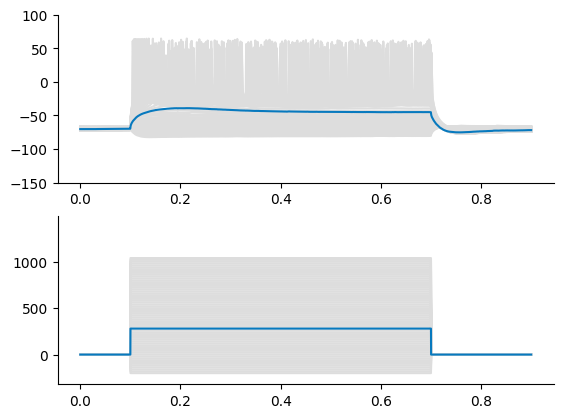

In [25]:
test_fig = plot_iclamp_sweep(test_data_set, test_sweep_table['sweep_number'].tolist(), 24, min_max_i=(-320, 1490), min_max_v=(-150, 100))
plt.show()

In [26]:
# reuse figure to plot another sweep
test_fig=plot_iclamp_sweep(test_data_set, test_sweep_table['sweep_number'].tolist(), 40, fig=test_fig, min_max_i=(-320, 1490), min_max_v=(-150, 100))
test_fig.show()

In [27]:
figs_me_path = Path('electro_L5_me_figs_0725')
figs_me_path.mkdir(exist_ok=True)

In [29]:
for _, row in tqdm(electro_df_me.iterrows(), total=electro_df_me.shape[0], desc='plot neuron'):
    plot_nwb_trace(row['path'], row['Cell'], figs_me_path, min_max_i=(-320, 1490), min_max_v=(-150, 100))

plot neuron:   0%|          | 0/154 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/69 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

In [30]:
failed_me=[row['Cell'] for _, row in electro_df_me.iterrows() if len([f for f in (figs_me_path/Path(row['Cell'])).iterdir()])<2]
len(failed_me)

0

In [ ]:
from shutil import rmtree
for d in failed_me:
    rmtree(figs_me_path/d)
removed_me = [row['Cell'] for _, row in electro_df_me.iterrows() if not (figs_me_path/row['Cell']).exists()]
len(removed_me)

In [14]:
figs_nm_path = Path('electro_L5_figs')
figs_nm_path.mkdir(exist_ok=True)

In [15]:
for _, row in tqdm(electro_df_nm.iterrows(), total=electro_df_nm.shape[0], desc='plot neuron'):
    plot_nwb_trace(row['path'], row['Cell'], figs_nm_path)

plot neuron:   0%|          | 0/205 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/68 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/60 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

plot sweep:   0%|          | 0/80 [00:00<?, ?it/s]

In [44]:
failed_nm=[row['Cell'] for _, row in electro_df_nm.iterrows() if len([f for f in (figs_nm_path/Path(row['Cell'])).iterdir()])<2]

165

In [47]:
for d in failed_nm:
    rmtree(figs_nm_path/d)
removed_nm = [row['Cell'] for _, row in electro_df_nm.iterrows() if not (figs_nm_path/row['Cell']).exists()]
len(removed_nm)

/usr/local/envs/neuron/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/envs/neuron/lib/python3.8/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/stimulus.py:88: UserWarning: Could not find stimulus: NA
  warnings.warn("Could not find stimulus: %s" % tag)
/usr/local/envs/neuron/lib/python3.8/site-packages/ipfx/stimulus.py:88: UserWarning: Could not find stimulus: N/A
  warnings.warn("Could not find stimulus: %s" % tag)


# Extract features

spiking histogram 

In [19]:
if '/opt/data/EphysExtraction/EphysExtraction' not in sys.path:
    sys.path.append('/opt/data/EphysExtraction/EphysExtraction')

In [33]:
from Nature.electro_utils import get_spiking_histogram_with_half_rate

spiking_hist_df_me = pd.DataFrame({
    'Cell': row['Cell'], **get_spiking_histogram_with_half_rate(row['path'], num_bins=30)
} for _, row in tqdm(electro_df_me.iterrows(), total=electro_df_me.shape[0]))

  0%|          | 0/154 [00:00<?, ?it/s]

In [34]:
res_AI_isi_df = spiking_hist_df_me.set_index('Cell').select_dtypes(include=['float64'])

res_array_df=spiking_hist_df_me.set_index('Cell').select_dtypes(include=['object'])
with pd.ExcelWriter('me_spiking_features_0819.xlsx') as writer:
    res_AI_isi_df.to_excel(writer, sheet_name='AI_ISI')
    for col in res_array_df.columns:
        res_df = pd.DataFrame(res_array_df[col].tolist(), index=res_array_df.index)
        res_df.to_excel(writer, sheet_name=col)

In [35]:
spiking_hist_df_nm = pd.DataFrame({
    'Cell': row['Cell'],
    **get_spiking_histogram_with_half_rate(row['path'], num_bins=30)
} for _, row in tqdm(electro_df_nm.iterrows(), total=electro_df_nm.shape[0]))

  0%|          | 0/315 [00:00<?, ?it/s]

In [36]:
res_AI_isi_df = spiking_hist_df_nm.set_index('Cell').select_dtypes(include=['float64'])

res_array_df=spiking_hist_df_nm.set_index('Cell').select_dtypes(include=['object'])
with pd.ExcelWriter('spiking_features_no_morpho_0819.xlsx') as writer:
    res_AI_isi_df.to_excel(writer, sheet_name='AI_ISI')
    for col in res_array_df.columns:
        res_df = pd.DataFrame(res_array_df[col].tolist(), index=res_array_df.index)
        res_df.to_excel(writer, sheet_name=col)